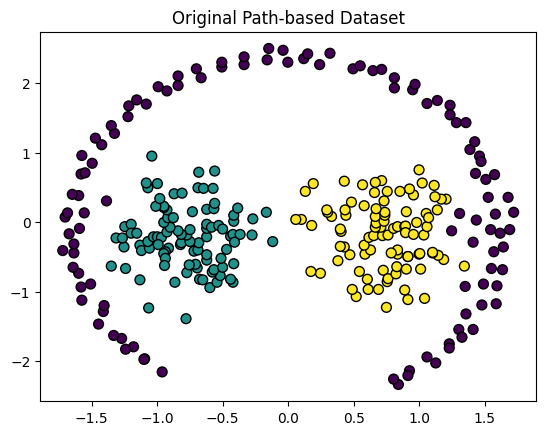

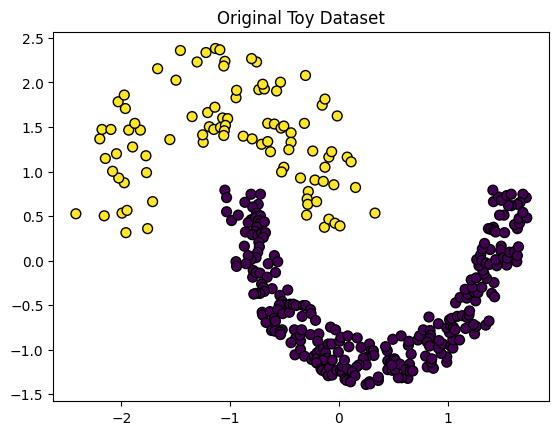

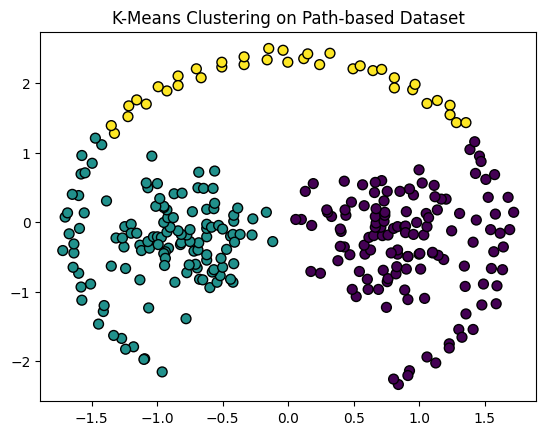

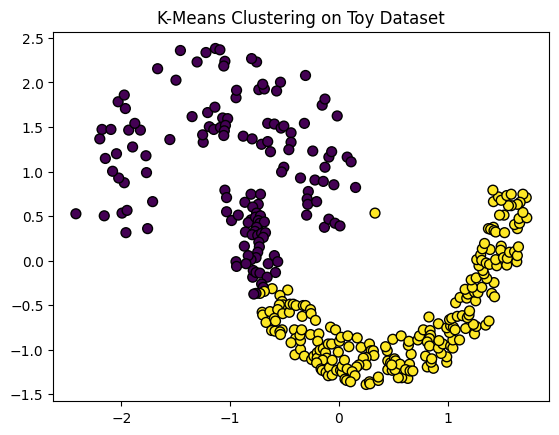

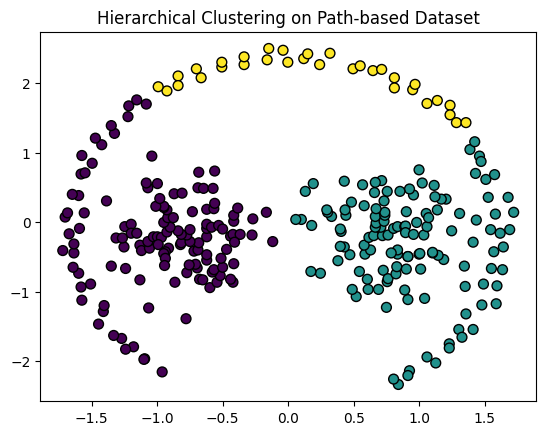

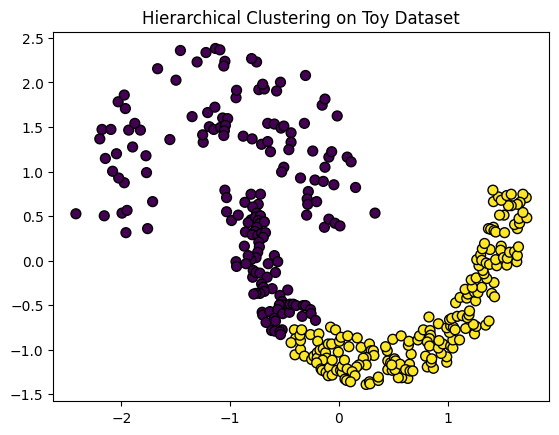

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

# Load datasets
pathbased_file = "Pathbased.xlsx"
toy_file = "Toy.xlsx"

df_path = pd.read_excel(pathbased_file)
df_toy = pd.read_excel(toy_file)

# Rename columns properly
df_path.columns = ["Feature1", "Feature2", "Label"]
df_toy.columns = ["Feature1", "Feature2", "Label"]

# Extract features and labels
X_path = df_path[["Feature1", "Feature2"]].values
y_path = df_path["Label"].values

X_toy = df_toy[["Feature1", "Feature2"]].values
y_toy = df_toy["Label"].values

def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
    plt.title(title)
    plt.show()

# Standardize features
scaler = StandardScaler()
X_path = scaler.fit_transform(X_path)
X_toy = scaler.fit_transform(X_toy)

# Apply K-Means clustering
kmeans_path = KMeans(n_clusters=len(set(y_path)), random_state=42).fit(X_path)
kmeans_toy = KMeans(n_clusters=len(set(y_toy)), random_state=42).fit(X_toy)

# Apply Hierarchical Clustering
hierarchical_path = AgglomerativeClustering(n_clusters=len(set(y_path))).fit(X_path)
hierarchical_toy = AgglomerativeClustering(n_clusters=len(set(y_toy))).fit(X_toy)

# Plot original datasets
plot_clusters(X_path, y_path, "Original Path-based Dataset")
plot_clusters(X_toy, y_toy, "Original Toy Dataset")

# Plot K-Means results
plot_clusters(X_path, kmeans_path.labels_, "K-Means Clustering on Path-based Dataset")
plot_clusters(X_toy, kmeans_toy.labels_, "K-Means Clustering on Toy Dataset")

# Plot Hierarchical clustering results
plot_clusters(X_path, hierarchical_path.labels_, "Hierarchical Clustering on Path-based Dataset")
plot_clusters(X_toy, hierarchical_toy.labels_, "Hierarchical Clustering on Toy Dataset")


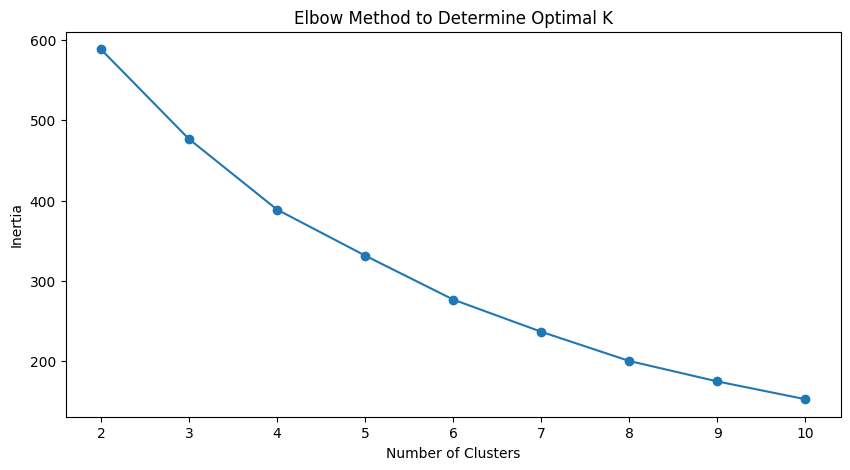

Optimal number of clusters: 10
Silhouette Score: 0.42076374869477745
Adjusted Rand Index: 0.47526769196270063
Silhouette Score after PCA: 0.38346444842179683
Adjusted Rand Index after PCA: 0.5429162357807652


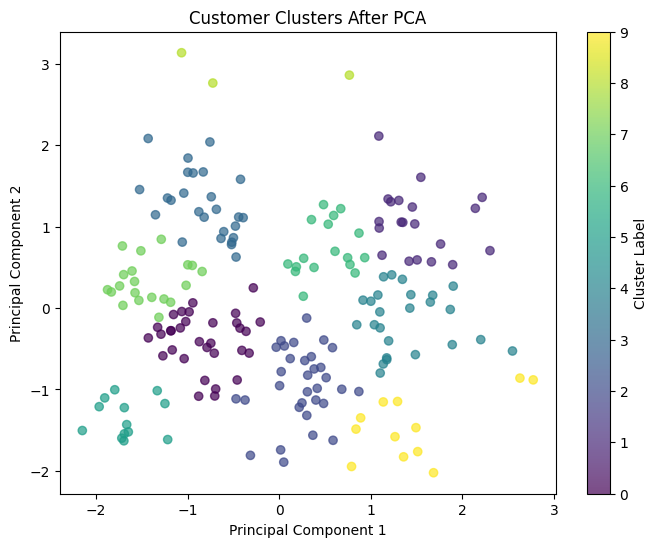

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset
file_path = "Shop.csv"
df = pd.read_csv(file_path)

# Drop CustomerID (since it's just an identifier)
df.drop(columns=['CustomerID'], inplace=True)

# Convert 'Genre' column to numerical values using Label Encoding
if 'Genre' in df.columns:
    encoder = LabelEncoder()
    df['Genre'] = encoder.fit_transform(df['Genre'])  # Male=1, Female=0 (or vice versa)

# Extract features
X = df.values

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

# Choose optimal K (based on highest silhouette score)
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Apply K-Means with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# Evaluate clustering performance
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score}")

# Splitting dataset for Rand Index Calculation (Simulated Ground Truth)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, labels, test_size=0.2, random_state=42)
kmeans_test = KMeans(n_clusters=optimal_k, random_state=42, n_init=10).fit(X_test)
rand_index = adjusted_rand_score(y_test, kmeans_test.labels_)
print(f"Adjusted Rand Index: {rand_index}")

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means clustering after PCA
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels_pca = kmeans_pca.fit_predict(X_pca)

# Evaluate clustering performance after PCA
sil_score_pca = silhouette_score(X_pca, labels_pca)
print(f"Silhouette Score after PCA: {sil_score_pca}")

# Splitting dataset for Rand Index Calculation after PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, labels_pca, test_size=0.2, random_state=42)
kmeans_test_pca = KMeans(n_clusters=optimal_k, random_state=42, n_init=10).fit(X_test_pca)
rand_index_pca = adjusted_rand_score(y_test_pca, kmeans_test_pca.labels_)
print(f"Adjusted Rand Index after PCA: {rand_index_pca}")

# Visualization of clusters after PCA
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Customer Clusters After PCA')
plt.colorbar(label="Cluster Label")
plt.show()
